### Estimate the total compensation to be provided to an employee

- Imagine you are working as a data scientist in a big organization which has thousands of employees. The HR department is planning to provide some additional compensation to each working employee which needs to be calculated by looking at the profile of each employee and the benefits they are getting. 

- The HR department asks your help if you can use your data science and machine learning skills and calculate an estimated ‘Total Compensation’ for each employee.

## Data Description

- OGC: Organization Group Code - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police, Fire, Adult Probation, District Attorney, and Sheriff.

- OG: Organization Group names

- DC: Department Code - Departments are the primary organizational unit used by the City and County of San Francisco. Examples include Recreation and Parks, Public Works, and the Police Department.

- Dept: Department name

- UC: Union Code - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).

- Union: Union names

- JF: Job Family - Job Family combines similar Jobs into meaningful groups.

- Job: Job name

- EI: Employee Identifier

- Salaries: Salary of the employee

- Overtime: Amounts paid to City employees working in excess of 40 hours per week. 

- H/D: Health/Dental - City-paid premiums to health and dental insurance plans covering City employees. To protect confidentiality as legally required, pro-rated citywide averages are presented in lieu of employee-specific health and dental benefits. 

- YT: Year Type - Fiscal (July through June) or Calendar (January through December)

- Total_Compensation: The final compensation i.e. the sum of all salaries and benefits paid to City employees.

### Dataset Link: https://drive.google.com/file/d/1mSkKEe0SUJ7AZHiubxKSke7HWf75JA_Z/view?usp=sharing



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('train_set.csv')
df

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",Human Services,Senior Eligibility Worker,9610,78980,30115,13068.80,Fiscal,147079
287832,2015,5,Culture & Recreation,LIB,Public Library,790,"SEIU - Miscellaneous, Local 1021",Library,Librarian 1,790,30704,0,5465.57,Calendar,40174
287833,2014,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,6,"Electrical Workers, Local 6",Journeyman Trade,Electronic Maintenance Tech,38352,104451,0,13054.94,Calendar,164669
287834,2013,1,Public Protection,JUV,Juvenile Probation,250,"SEIU - Health Workers, Local 1021",Housekeeping & Laundry,Porter,29266,14425,0,4051.90,Calendar,19594


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287836 entries, 0 to 287835
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                287836 non-null  int64  
 1   OGC                 287836 non-null  int64  
 2   OG                  287836 non-null  object 
 3   DC                  287836 non-null  object 
 4   Dept                287836 non-null  object 
 5   UC                  287836 non-null  int64  
 6   Union               287800 non-null  object 
 7   JF                  287798 non-null  object 
 8   Job                 287836 non-null  object 
 9   EI                  287836 non-null  int64  
 10  Salaries            287836 non-null  int64  
 11  Overtime            287836 non-null  int64  
 12  H/D                 287836 non-null  float64
 13  YT                  287836 non-null  object 
 14  Total_Compensation  287836 non-null  int64  
dtypes: float64(1), int64(7), object(7)

In [4]:
round(df.describe(),2)

,Year,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation
count,287836.00,287836.00,287836.00,287836.00,287836.00,287836.00,287836.00,287836.00
mean,2014.25,2.98,490.54,26913.06,63262.71,4401.04,8932.88,97990.33
std,1.02,1.58,333.24,15539.72,44638.66,11079.14,4894.07,67750.02
min,2013.00,1.00,1.00,1.00,-68771.00,-12308.00,-2940.47,-74082.00
25%,2013.00,2.00,236.00,13434.00,23406.00,0.00,4358.35,35977.00
50%,2014.00,2.00,535.00,27013.00,62504.50,0.00,11982.04,98033.00
75%,2015.00,4.00,790.00,40397.25,93000.25,2738.00,12801.79,142138.25
max,2016.00,7.00,990.00,53794.00,515101.00,227313.00,21872.80,653498.00


In [5]:
# Check the categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print("Categorical : ",categorical)

Categorical :  ['OG', 'DC', 'Dept', 'Union', 'JF', 'Job', 'YT']


In [6]:
# Check the numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print("Numerical : ",numerical)

Numerical :  ['Year', 'OGC', 'UC', 'EI', 'Salaries', 'Overtime', 'H/D', 'Total_Compensation']


In [7]:
# Check for null values
for var in df[categorical]:
    print(df[var].name)
    print(df[var].isnull().sum())

OG
0
DC
0
Dept
0
Union
36
JF
38
Job
0
YT
0


In [8]:
round(df[categorical].describe(),2)

,OG,DC,Dept,Union,JF,Job,YT
count,287836,287836,287836,287800,287798,287836,287836
unique,7,54,54,73,55,1136,2
top,"Public Works, Transportation & Commerce",DPH,Public Health,"SEIU - Miscellaneous, Local 1021",Nursing,Transit Operator,Fiscal
freq,91256,62834,62859,81349,30047,17830,143936


In [9]:
for var in df[numerical]:
    print(df[var].name)
    print(df[var].isnull().sum())

Year
0
OGC
0
UC
0
EI
0
Salaries
0
Overtime
0
H/D
0
Total_Compensation
0


In [10]:
for var in df[numerical]:
    print(df[var].value_counts())

Year
2014    86463
2013    83678
2015    79723
2016    37972
Name: count, dtype: int64
OGC
2    91173
4    62854
1    54752
3    26807
5    26127
6    25829
7      294
Name: count, dtype: int64
UC
790    80916
21     35836
791    21699
911    19092
253    17770
       ...  
567        1
769        1
782        1
635        1
421        1
Name: count, Length: 789, dtype: int64
EI
50212    20
46939    18
5909     18
42254    17
32402    17
         ..
30075     1
47834     1
47265     1
5429      1
25750     1
Name: count, Length: 52403, dtype: int64
Salaries
 0         3354
 112703     884
 118898     624
 56531      486
 55026      436
           ... 
 24938        1
 66738        1
 153615       1
-17635        1
 87126        1
Name: count, Length: 104444, dtype: int64
Overtime
0        162860
41          141
25          120
46          117
4           110
          ...  
23864         1
21364         1
25443         1
24774         1
37343         1
Name: count, Length: 33632, dtype

In [11]:
df['OGC'].unique()

array([4, 6, 1, 2, 3, 5, 7])

In [12]:
df['Dept'].unique()

array(['Public Health', 'Assessor/Recorder', 'Police', 'PUC Hetch Hetchy',
       'Treasurer/Tax Collector', 'Human Services',
       'Municipal Transportation Agency',
       'Recreation and Park Commission', 'Fire Department',
       'Fine Arts Museum', 'Airport Commission',
       'PUC Public Utilities Commission', 'Public Library', 'Controller',
       'Superior Court', 'Sheriff',
       'General Services Agency - City Admin', 'PUC Water Department',
       'General Services Agency - Public Works',
       'General Services Agency - Technology', 'Mayor',
       'Department of Building Inspection', 'City Planning',
       'Human Resources', 'Adult Probation', 'Board of Supervisors',
       'Port', 'Economic and Workforce Development', 'District Attorney',
       'PUC Wastewater Enterprise', 'Children and Families Commission',
       'Elections', 'Department of Emergency Management',
       'Public Defender', 'City Attorney', 'Asian Art Museum',
       'Juvenile Probation', 'War Memor

In [13]:
df['Job'].unique()

array(['Morgue Attendant', 'Stationary Engineer',
       'Senior Real Property Appraiser', ...,
       'Supervising Mediator, UFCS', 'Environmental Hlth Tech 2',
       'Cfdntal Sctry To Distric Atty'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder

en = LabelEncoder()

for col in categorical:
    df[col] = en.fit_transform(df[col])

df[categorical].dtypes

OG       int64
DC       int64
Dept     int64
Union    int64
JF       int64
Job      int64
YT       int64
dtype: object

<Axes: title={'center': 'Correlation Matrix for Categroical Variables'}>

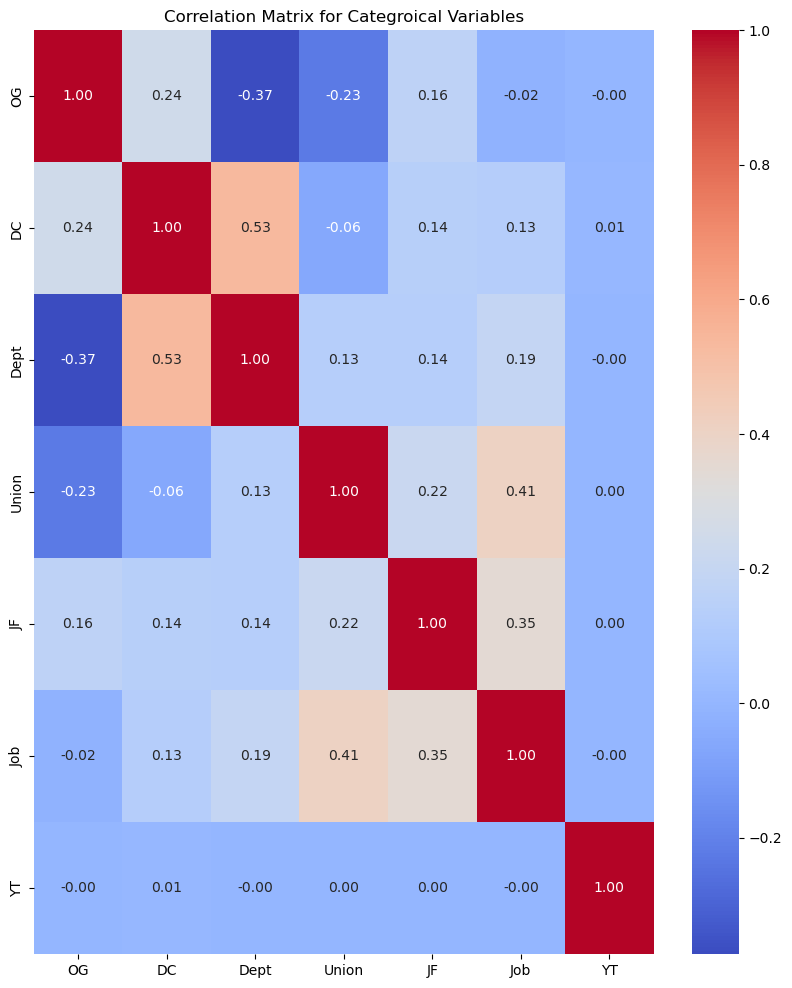

In [15]:
plt.figure(figsize=(10,12))
plt.title('Correlation Matrix for Categroical Variables')
sns.heatmap(df[categorical].corr(), annot=True, fmt='.2f', cmap='coolwarm')

In [16]:
round(df[numerical].describe(),2)

,Year,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation
count,287836.00,287836.00,287836.00,287836.00,287836.00,287836.00,287836.00,287836.00
mean,2014.25,2.98,490.54,26913.06,63262.71,4401.04,8932.88,97990.33
std,1.02,1.58,333.24,15539.72,44638.66,11079.14,4894.07,67750.02
min,2013.00,1.00,1.00,1.00,-68771.00,-12308.00,-2940.47,-74082.00
25%,2013.00,2.00,236.00,13434.00,23406.00,0.00,4358.35,35977.00
50%,2014.00,2.00,535.00,27013.00,62504.50,0.00,11982.04,98033.00
75%,2015.00,4.00,790.00,40397.25,93000.25,2738.00,12801.79,142138.25
max,2016.00,7.00,990.00,53794.00,515101.00,227313.00,21872.80,653498.00


In [17]:
round(df[categorical].describe())

,OG,DC,Dept,Union,JF,Job,YT
count,287836.0,287836.0,287836.0,287836.0,287836.0,287836.0,287836.0
mean,3.0,27.0,36.0,51.0,30.0,650.0,1.0
std,2.0,13.0,12.0,16.0,14.0,297.0,1.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,19.0,31.0,47.0,21.0,421.0,0.0
50%,5.0,22.0,38.0,58.0,31.0,713.0,1.0
75%,6.0,35.0,45.0,59.0,40.0,869.0,1.0
max,6.0,53.0,53.0,73.0,55.0,1135.0,1.0


<Axes: title={'center': 'Correlation Matrix for Numerical Variables'}>

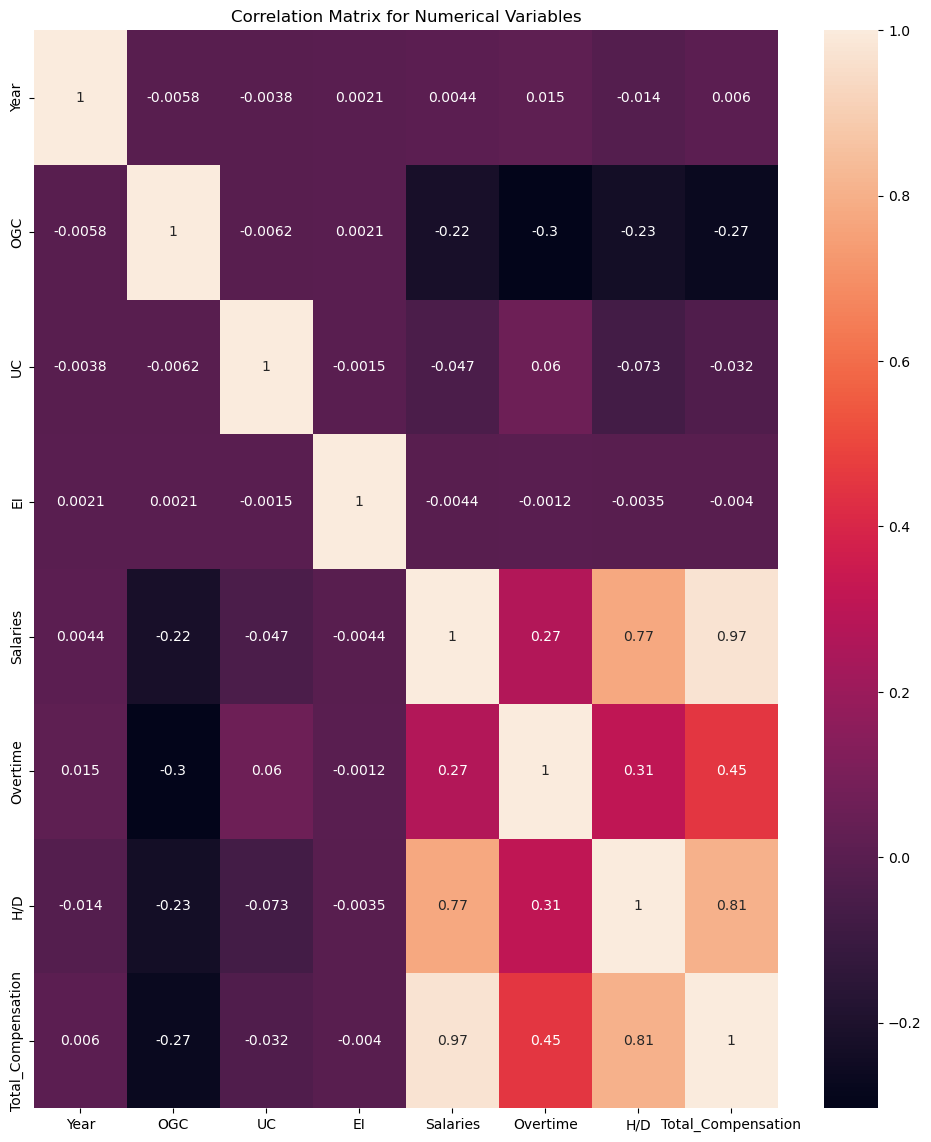

In [18]:
plt.figure(figsize=(12,14))
plt.title('Correlation Matrix for Numerical Variables')
sns.heatmap(df[numerical].corr(), annot=True, fmt='.2g')

/home/kranthi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


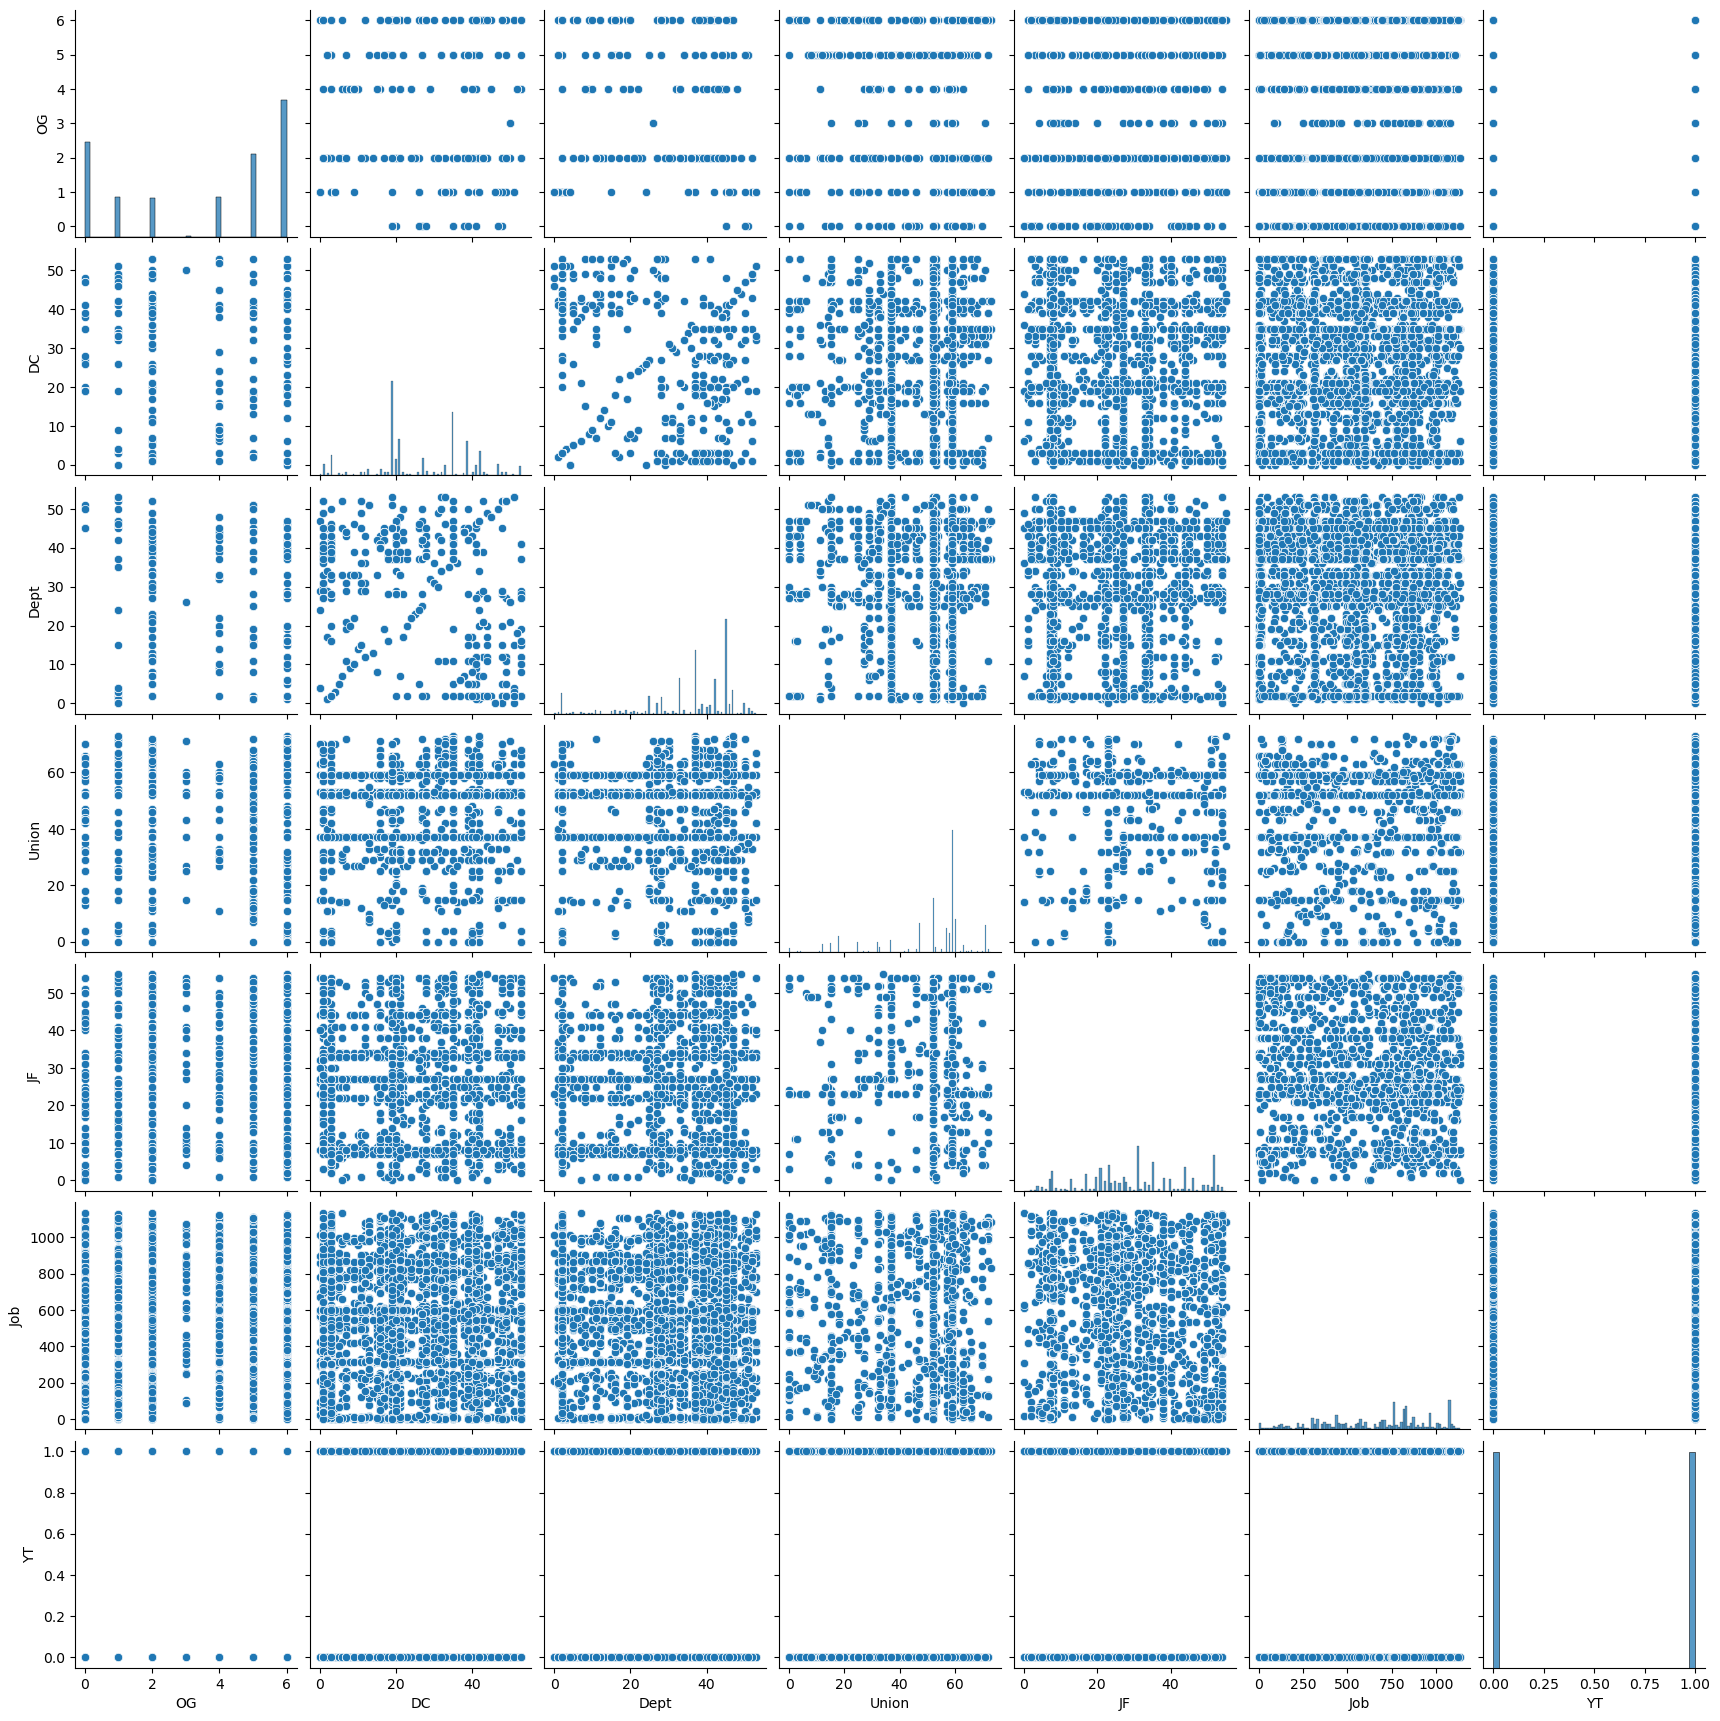

In [19]:
sns.pairplot(df[categorical], kind='scatter')

/home/kranthi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


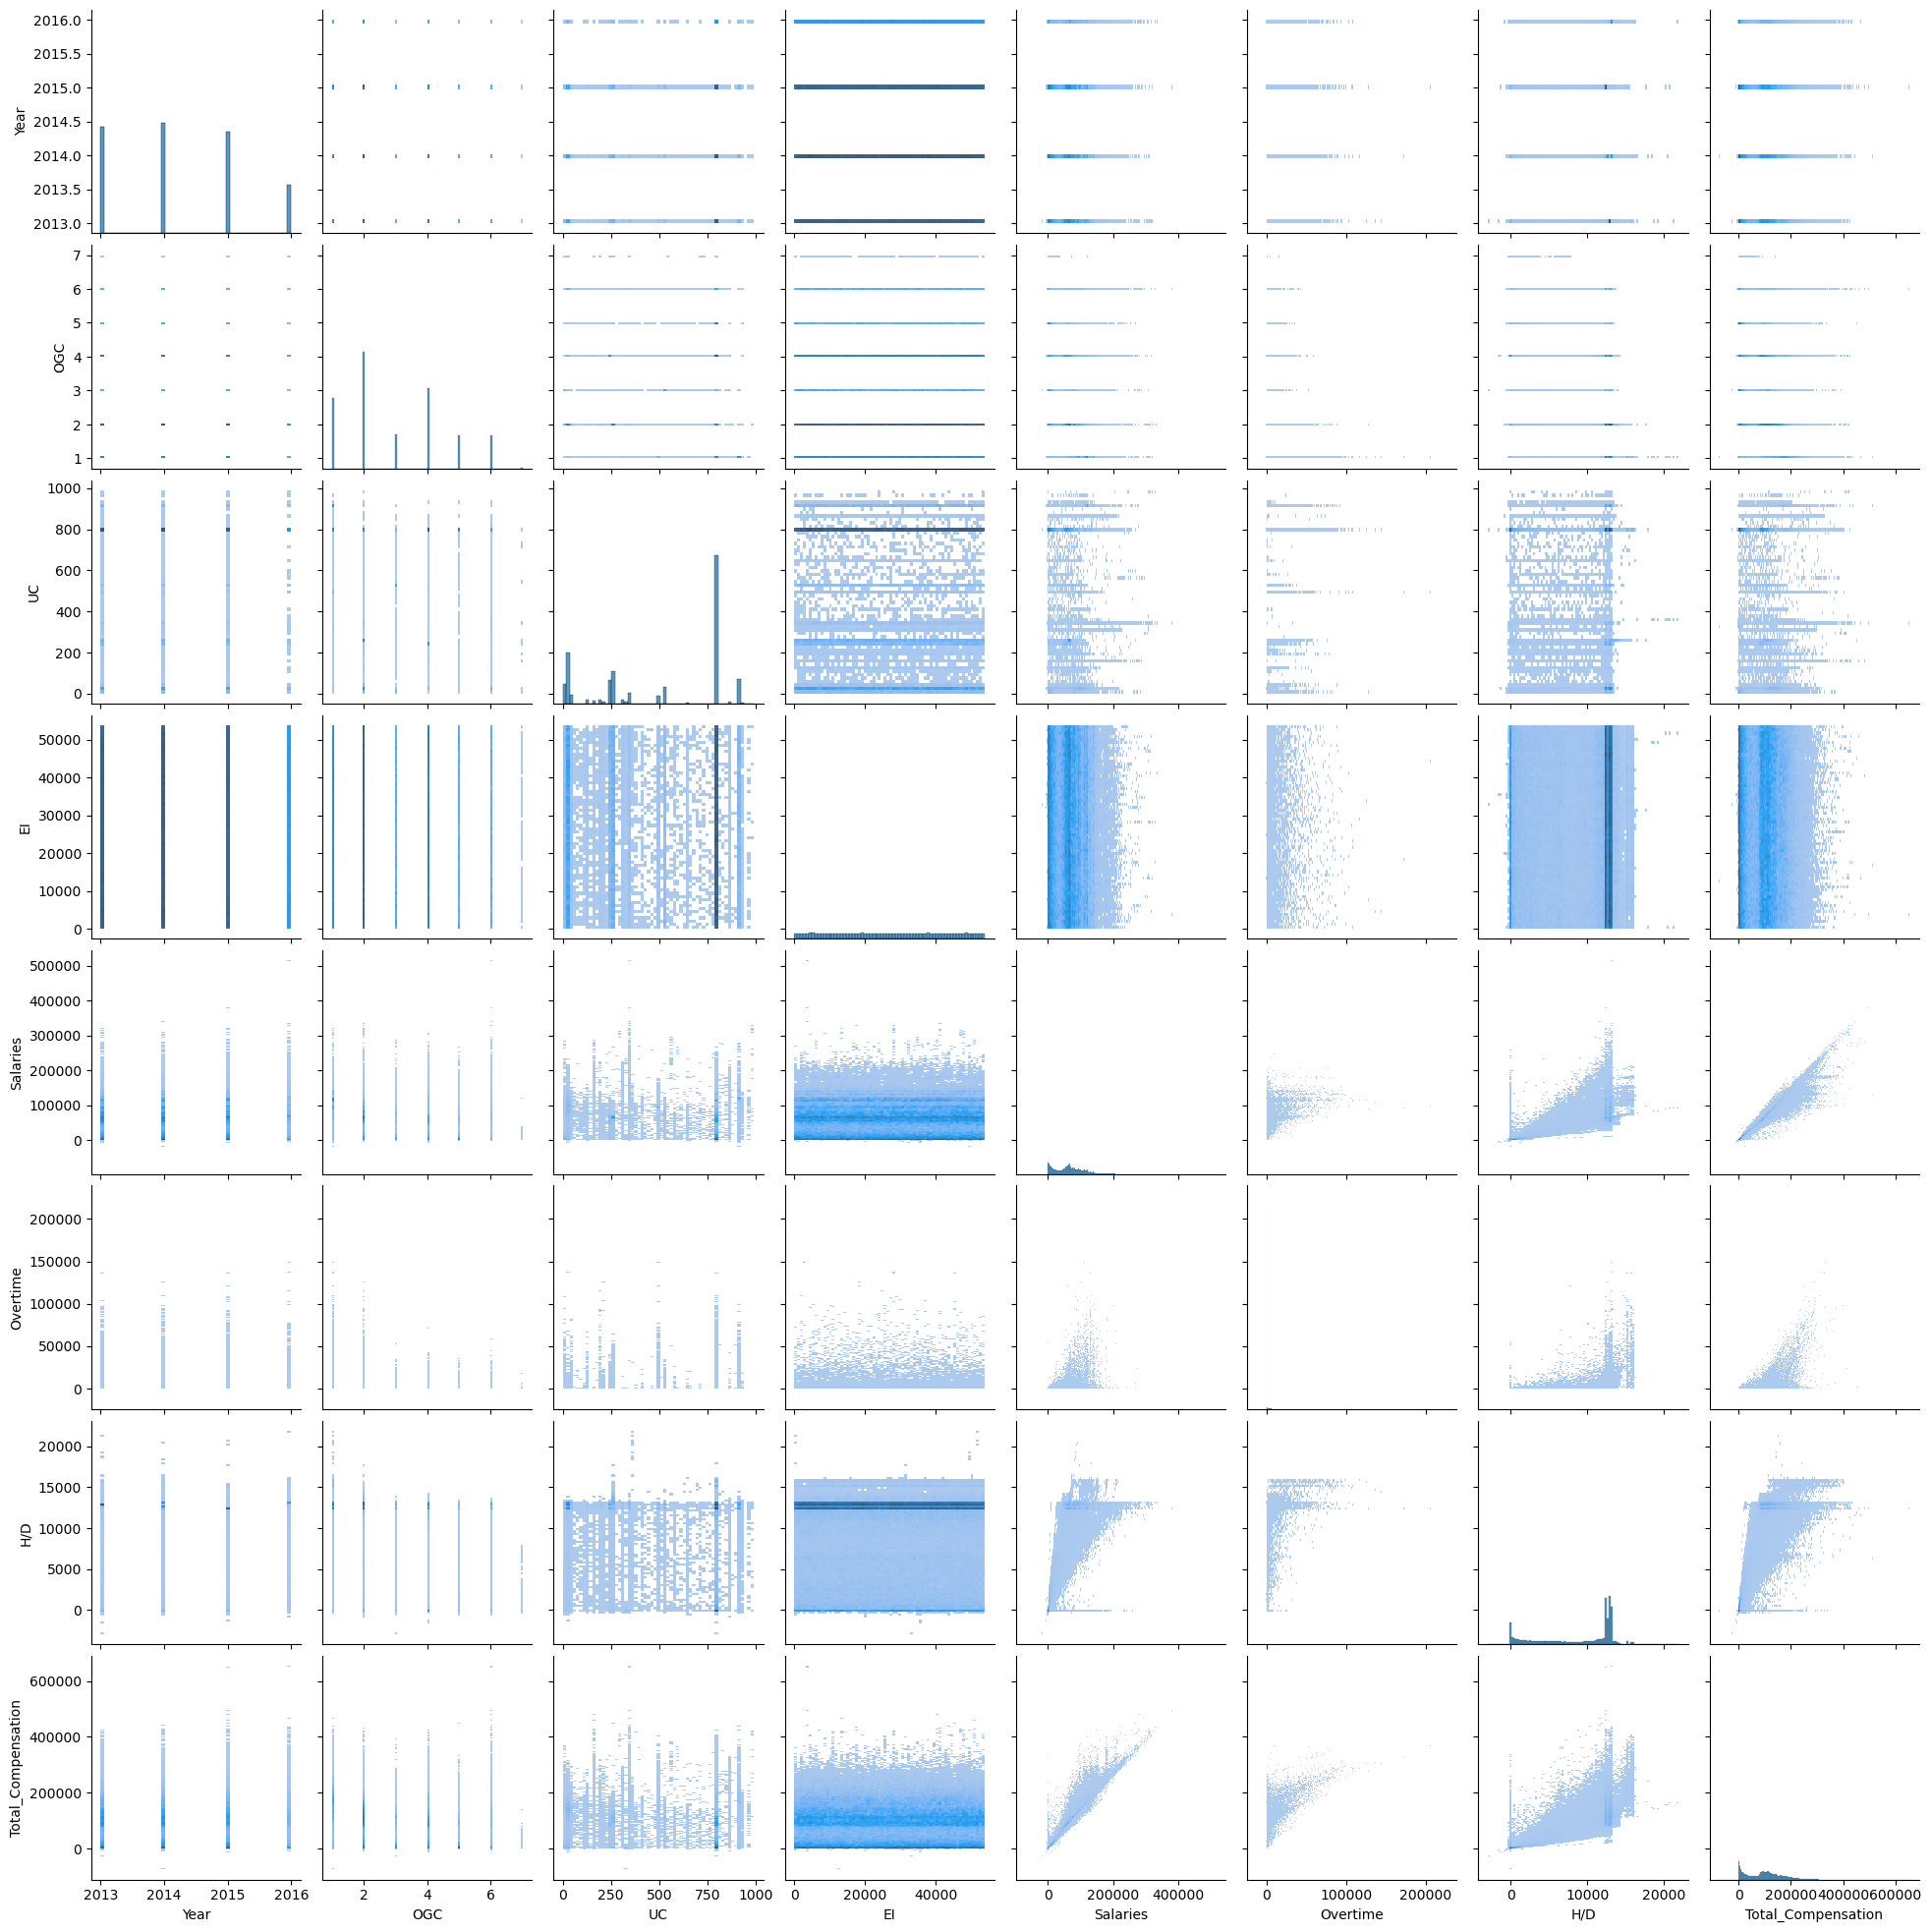

In [20]:
sns.pairplot(df[numerical], kind='hist')

In [30]:
from sklearn.model_selection import train_test_split

# Combine categorical & numerical
df1 = pd.concat([df[categorical], df[numerical]], axis=1)

# Define bins for total compensation
bins = [0, 50000, 100000, 150000, 200000, 250000, df['Total_Compensation'].max()]
labels = ['0-50k', '50-100k', '100-150k', '150-200k', '200-250k', '250k+']
df1['Compensation_Range'] = pd.cut(df['Total_Compensation'], bins=bins, labels=labels)

# Convert the target variable to numerical format
df1['Compensation_Range'] = df1['Compensation_Range'].astype('category').cat.codes


X = df1.drop(['Total_Compensation', 'Compensation_Range'], axis=1)
y = df1['Total_Compensation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [31]:
df1

,OG,DC,Dept,Union,JF,Job,YT,Year,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation,Compensation_Range
0,0,19,45,57,28,671,0,2015,4,250,6725,12196,0,0.00,16158,0
1,0,19,45,63,23,1011,1,2013,4,39,25058,74639,2820,12703.31,115784,2
2,2,5,5,52,6,911,0,2015,6,21,46108,100554,0,12424.50,144708,2
3,5,39,42,47,35,925,1,2016,1,911,33369,140164,52754,13043.87,242323,4
4,6,28,38,52,22,496,0,2013,2,21,28684,58813,0,7655.28,82106,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,4,21,33,58,21,877,1,2016,3,535,9610,78980,30115,13068.80,147079,2
287832,1,33,46,59,26,563,0,2015,5,790,790,30704,0,5465.57,40174,0
287833,6,28,38,15,23,378,0,2014,2,6,38352,104451,0,13054.94,164669,3
287834,5,32,34,57,20,764,0,2013,1,250,29266,14425,0,4051.90,19594,0


In [32]:
X_train

,OG,DC,Dept,Union,JF,Job,YT,Year,OGC,UC,EI,Salaries,Overtime,H/D
260278,0,19,45,52,7,772,0,2013,4,21,44666,114756,0,12837.090000
133133,6,35,37,71,52,1076,0,2014,2,253,34576,7423,1661,2342.321967
91935,6,35,37,71,52,1076,0,2013,2,253,16553,63782,16976,12993.195980
115146,2,43,21,59,8,544,1,2016,6,790,2917,514,340,159.000000
48793,2,1,27,59,20,300,1,2016,6,790,8101,24932,6225,6858.640000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212912,0,19,45,57,14,439,1,2014,4,250,44473,3998,0,1294.400000
65615,5,39,42,47,35,759,0,2015,1,911,51929,117140,7986,12424.500000
253799,0,19,45,59,28,473,0,2015,4,790,19430,67259,0,12424.157180
210755,5,13,51,35,49,272,1,2015,1,356,47181,121939,0,12500.560000


In [33]:
X_test

,OG,DC,Dept,Union,JF,Job,YT,Year,OGC,UC,EI,Salaries,Overtime,H/D
22696,6,35,37,37,52,596,1,2016,2,351,34415,122146,0,13068.8000
40068,6,35,37,71,52,1076,0,2014,2,253,31678,65107,7258,13795.1768
170241,6,40,43,59,45,1020,1,2013,2,790,11175,55510,0,12801.7900
215888,4,21,33,58,21,796,0,2014,3,535,48047,51664,0,8033.8100
121548,0,19,45,60,31,964,0,2015,4,791,32957,6245,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147761,6,41,39,59,8,789,0,2013,2,790,43067,74628,9583,12918.2400
114183,5,27,25,18,17,434,0,2013,1,798,8154,116956,4138,15788.9700
158119,0,19,45,57,31,713,0,2015,4,250,45261,5712,0,1529.1700
121734,5,27,25,18,17,576,1,2015,1,798,6777,74128,1691,8621.0700


In [34]:
from sklearn.linear_model import LinearRegression

Lin_reg = LinearRegression()
Lin_reg.fit(X_train, y_train)

LinearRegression()

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred = Lin_reg.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 4102.10983718943
Mean Squared Error: 56495037.94313637
R-squared: 0.9876703609055026
